In [1]:
import pandas as pd
import numpy as np

In [20]:
sales = pd.read_csv('./input/cleanedmonthly.csv')
test = pd.read_csv('./input/test.csv')

In [21]:
sales.drop(['median_monthly_price', 'year', 'date_block_num'], inplace=True, axis=1)

In [22]:
sales

,month,shop_id,item_id,item_cnt_month
0,1,57,32,6.0
1,1,57,33,3.0
2,1,57,35,1.0
3,1,57,43,1.0
4,1,57,51,2.0
...,...,...,...,...
1608219,10,59,22087,6.0
1608220,10,59,22088,2.0
1608221,10,59,22091,1.0
1608222,10,59,22100,1.0


In [23]:
sales = sales.groupby(['month', 'shop_id', 'item_id']).sum()

In [24]:
sales.reset_index(inplace=True)

In [25]:
sales

,month,shop_id,item_id,item_cnt_month
0,1,2,27,1.0
1,1,2,32,1.0
2,1,2,33,2.0
3,1,2,67,1.0
4,1,2,99,1.0
...,...,...,...,...
1393372,12,59,22087,27.0
1393373,12,59,22088,30.0
1393374,12,59,22091,11.0
1393375,12,59,22092,10.0


In [26]:
sales.item_id.isna().sum()

0

In [27]:
sales.shop_id.isna().sum()

0

In [28]:
train_items = sales.item_id.unique()
train_items = np.sort(train_items)

In [29]:
test_items = test.item_id.unique()
test_items = np.sort(test_items)

In [30]:
items_only_test = []

In [31]:
for item in test_items:
    if item not in train_items:
        items_only_test.append(item)

In [32]:
len(items_only_test)

363

In [33]:
shops_test = np.sort(test.shop_id.unique())
shops_train = np.sort(sales.shop_id.unique())

In [34]:
shops_only_test = []
for shop in shops_test:
    if shop not in shops_train:
        shops_only_test.append(shop)

In [35]:
len(shops_only_test)

0

In [36]:
mask = test.item_id.isin(items_only_test)

In [37]:
extra = test.loc[mask].copy()

In [38]:
extra.shape

(15246, 3)

In [39]:
15246*12

182952

In [40]:
a = []
for i in range(12):
    month = (i+1)*np.ones(len(extra))
    shop_id = extra.shop_id
    item_id = extra.item_id
    a.append(pd.DataFrame({'month': month,
                           'item_id': item_id,
                           'shop_id': shop_id
                          }))

In [56]:
# a

In [41]:
total = pd.concat(a, axis=0)

In [55]:
total

,month,item_id,shop_id
1,1.0,5320,5
4,1.0,5268,5
45,1.0,5826,5
64,1.0,3538,5
65,1.0,3571,5
...,...,...,...
214130,12.0,15033,45
214150,12.0,7572,45
214154,12.0,9030,45
214161,12.0,1867,45


In [43]:
total.duplicated().value_counts()

False    182952
dtype: int64

In [44]:
total['item_cnt_month'] = 0

In [45]:
total

,month,item_id,shop_id,item_cnt_month
1,1.0,5320,5,0
4,1.0,5268,5,0
45,1.0,5826,5,0
64,1.0,3538,5,0
65,1.0,3571,5,0
...,...,...,...,...
214130,12.0,15033,45,0
214150,12.0,7572,45,0
214154,12.0,9030,45,0
214161,12.0,1867,45,0


In [46]:
total = pd.concat([sales, total])

In [47]:
total

,month,shop_id,item_id,item_cnt_month
0,1.0,2,27,1.0
1,1.0,2,32,1.0
2,1.0,2,33,2.0
3,1.0,2,67,1.0
4,1.0,2,99,1.0
...,...,...,...,...
214130,12.0,45,15033,0.0
214150,12.0,45,7572,0.0
214154,12.0,45,9030,0.0
214161,12.0,45,1867,0.0


In [48]:
total.sort_values(['shop_id', 'month', 'item_id'], inplace=True, ignore_index=True)

In [49]:
total

,month,shop_id,item_id,item_cnt_month
0,1.0,2,27,1.0
1,1.0,2,32,1.0
2,1.0,2,33,2.0
3,1.0,2,67,1.0
4,1.0,2,83,0.0
...,...,...,...,...
1576324,12.0,59,22088,30.0
1576325,12.0,59,22091,11.0
1576326,12.0,59,22092,10.0
1576327,12.0,59,22137,0.0


In [50]:
total.item_cnt_month.agg(['max', 'min', 'median', 'std', 'mean'])

max       2514.000000
min          0.000000
median       1.000000
std         11.235347
mean         2.317774
Name: item_cnt_month, dtype: float64

In [51]:
import matplotlib.pyplot as plt

In [52]:
%matplotlib inline

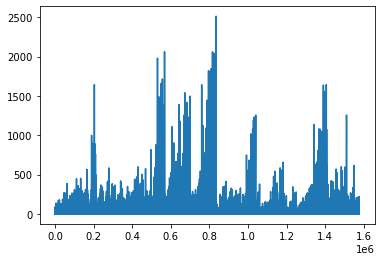

In [53]:
plt.plot(total.item_cnt_month)

In [54]:
total['shop_id_month'] = total.apply(lambda x: f'{x.shop_id} / {x.month}', axis=1)

In [55]:
total['shop_id_month'].nunique()

624

In [56]:
total.item_id.nunique()

22165

In [57]:
total

,month,shop_id,item_id,item_cnt_month,shop_id_month
0,1.0,2,27,1.0,2.0 / 1.0
1,1.0,2,32,1.0,2.0 / 1.0
2,1.0,2,33,2.0,2.0 / 1.0
3,1.0,2,67,1.0,2.0 / 1.0
4,1.0,2,83,0.0,2.0 / 1.0
...,...,...,...,...,...
1576324,12.0,59,22088,30.0,59.0 / 12.0
1576325,12.0,59,22091,11.0,59.0 / 12.0
1576326,12.0,59,22092,10.0,59.0 / 12.0
1576327,12.0,59,22137,0.0,59.0 / 12.0


In [58]:
new_cols = ['shop_id_month', 'item_id','item_cnt_month', 'shop_id', 'month']

In [59]:
total = total[new_cols]
total

,shop_id_month,item_id,item_cnt_month,shop_id,month
0,2.0 / 1.0,27,1.0,2,1.0
1,2.0 / 1.0,32,1.0,2,1.0
2,2.0 / 1.0,33,2.0,2,1.0
3,2.0 / 1.0,67,1.0,2,1.0
4,2.0 / 1.0,83,0.0,2,1.0
...,...,...,...,...,...
1576324,59.0 / 12.0,22088,30.0,59,12.0
1576325,59.0 / 12.0,22091,11.0,59,12.0
1576326,59.0 / 12.0,22092,10.0,59,12.0
1576327,59.0 / 12.0,22137,0.0,59,12.0


In [60]:
total.to_csv('./input/item_embeddings.csv', index=False)